In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_10/Wiskunde")

# Probabilities and classification

In [3]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 Probability theory 

### 1.1 Random variables in Python

When you flip a coin, what are the chances of getting a 'head'? When you draw a single card from a deck of cards, what are the chances it is a "king"? If you buy a lottery ticket, what are the chances you win a jackpot?

Probability is the branch of mathematics that deals with these questions. More specifically, it deals with the study of random events and their likelihood of occurring. It involves assigning a number between 0 and 1 (inclusive), to represent the likelihood or chance of an event happening. 0 means an impossible event and 1 means a certain event. The probability of an event can be calculated by dividing the number of favorable outcomes by the number of total possible outcomes. Let's see how we can simulate random events in Python, and use these to calculate the probability of specific events.

First, let us simulate a fair coin. That is, a coin that has a 50% chance of landing on heads and a 50% chance of landing on tails. This can be simulated in numpy using the np.random.choice() function as follows:

In [4]:
import numpy as np

In [5]:
coin_values = ['heads', 'tails']

def toss(coin_values, number=None):
    return np.random.choice(coin_values, number)

In [6]:
# Simulate one toss of the coin
toss(coin_values)

'heads'

In [7]:
# Simulate 20 coin tosses
toss(coin_values, 20)

array(['heads', 'tails', 'heads', 'tails', 'heads', 'heads', 'tails',
       'heads', 'tails', 'tails', 'heads', 'heads', 'heads', 'tails',
       'tails', 'tails', 'heads', 'tails', 'heads', 'heads'], dtype='<U5')

The np.random.choice() function onl works on 1 dimensional arrays or lists. In order to sample from a more complex data structure, you could use the np.shuffle() function and pick elements from the shuffled list.

In [8]:
suits = ['♠', '♥', '♦', '♣']
# Use the next line instead if the above line doesn't work
# suits = ['spades', 'hearts', 'diamonds', 'clubs']
cards = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

deck = np.array([(c, s) for c in cards for s in suits])

In [9]:
# Draw a single card from the deck

np.random.shuffle(deck)

print(f"Top card is {deck[0]}")

Top card is ['9' '♠']


In [10]:
# Draw five cards from the deck

np.random.shuffle(deck)

print(f"Top five cards are \n {deck[:5]}")

Top five cards are 
 [['3' '♠']
 ['A' '♠']
 ['J' '♠']
 ['K' '♠']
 ['K' '♦']]


Another option is to use the "random" library, and use the random.choice() function from this library. This is different ffrom the numpy.random library. This works on lists with multi-dimensional data. 

In [ ]:
import random

random.choice(deck)

array(['9', '♣'], dtype='<U2')

We can use simple Pythonic simulations to calculate the probabilities of certain events happening. For example, if you flip 3 fair coins, what is the probability of getting exactly 2 heads?

We can calculate this probability by hand - out of 3 coin flips, these are the possible outcomes (H = heads, T = tails):  
- T T T  
- T T H  
- T H T  
- T H H ✓  
- H T T  
- H T H ✓
- H H T ✓
- H H H

We can clearly tell that there are 8 equally possible outcomes, out of which 3 of these outcomes (marked with a ✓) have exactly two heads. So the probability of exactly 2 heads is $\frac{3}{8}$ or 0.375. We can verify this by simulating tossing 3 coins an extremely large number of times (say hundreds or even thousands), adding up the events that have exactly two heads, and dividing this by the total number of simulations. Provided we run this simulation a large enough number of times, our answer should converge to the probability 0.375.

In [ ]:
# Initialize a counter to count the number of valid events
counter = 0

# Simulate tossing 3 fair coins, for 100 times

for simulation in range(100):
    result = toss(coin_values, 3) # Toss 3 coins
    
    # Check if the result has exactly 2 heads
    valid = 1 if np.sum(result == 'heads') == 2 else 0
    
    # Update counter
    counter += valid
    
# Calculate estimated probability
est = counter / 100
print(f"After 100 simulations, the estimated probability of getting exactly 2 heads with 3 coin tosses is {est}")

After 100 simulations, the estimated probability of getting exactly 2 heads with 3 coin tosses is 0.44


This number should get a lot closer to the true probability with more simulations.

In [ ]:
# Initialize a counter to count the number of valid events
counter = 0

# Simulate tossing 3 fair coins, for 100 times

for simulation in range(1000000):
    result = toss(coin_values, 3) # Toss 3 coins
    
    # Check if the result has exactly 2 heads
    valid = 1 if np.sum(result == 'heads') == 2 else 0
    
    # Update counter
    counter += valid
    
# Calculate estimated probability
est = counter / 1000000
print(f"After 1000000 simulations, the estimated probability of getting exactly 2 heads with 3 coin tosses is {est}")

After 1000000 simulations, the estimated probability of getting exactly 2 heads with 3 coin tosses is 0.375853


### 1.2 Probability math

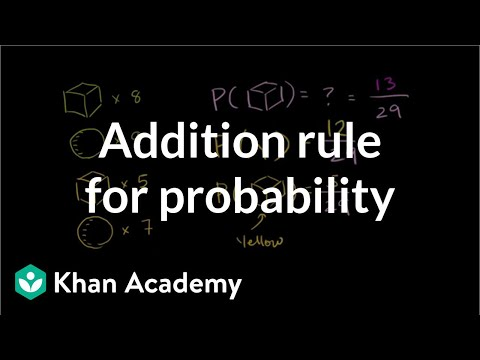

In [ ]:
YouTubeVideo("QE2uR6Z-NcU", width=800, height=500)

#### 1.2.1 Joint probability
Let’s say you have a fair coin and a fair six-sided die. You want to find the probability of flipping a heads and rolling a 6 on the coin and die, respectively. These are two separate probabilities of two separate events, but we want to find the probability that both events will occur together. This is known as a **joint probability**.

Think of a joint probability as an **AND** operator. I want to find the probability of flipping a heads AND rolling a 6. We want both events to happen together, so how do we calculate this probability?

There are two sides on a coin and six sides on the die, so the probability of heads is $\frac{1}{2}$ and the probability of six is $\frac{1}{6}$. The probability of both events occurring (assuming they are **independent**) is simply multiplying the two together. If P(A) is the probability of heads and P(B) is the probability of getting a 6 on the die, the **joint probability** is denoted by $P(A) \cap P(B) = P(A) \times P(B)$.

Probability of heads $P(A) = \frac{1}{2}$  
Probability of six $P(B) = \frac{1}{6}$  
Probability of heads AND six $P(A) \cap P(B) = \frac{1}{12}$

#### 1.2.2 Union probability
The union probability is the probability that either one **OR** the other event occurs. Let's start with the case where two (or more) events are **mutually exclusive**, that is events that cannot occur simultaneously - for example, if I roll one die I cannot simultaneously get a 4 and a 6. I can only get one outcome. In this case the union probability is the sum of the two individual probabilities and is denoted by $P(A) \cup P(B) = P(A) + P(B)$.

Probability of four on the die $P(A) = \frac{1}{6}$  
Probability of six on the die $P(B) = \frac{1}{6}$  
Probability of four OR six $P(A) \cup P(B) = \frac{1}{6} + \frac{1}{6} = \frac{1}{3}$

This relationship is only valid if events A and B are mutually exclusive.

But what about nonmutually exclusive events, which are events that can occur simultaneously? Let’s go back to the coin flip and die roll example. What is the probability of getting a heads OR a 6? In this case, we need to account for the events where we get both a head AND a 6 in our calculation. Therefore, this event needs to be subtracted to calculate the union probability:

Probability of heads on the coin $P(A) = \frac{1}{2}$  
Probability of six on the die $P(B) = \frac{1}{6}$  
Probability of heads OR six $P(A) \cup P(B) = P(A) + P(B) - P(A) \cap P(B) = \frac{1}{2} + \frac{1}{6} - \frac{1}{12} = \frac{7}{12}$.

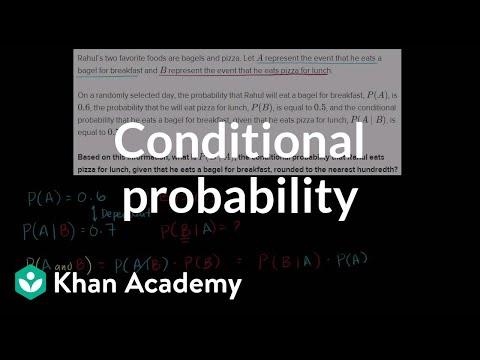

In [ ]:
YouTubeVideo("6xPkG2pA-TU", width=800, height=500)

#### 1.2.3 Conditional probability
Conditional probability is the probability of an event happening *after a certain event has happened* or *given a certain condition*. Putting this in mathematical terms, we write this as $P(A|B)$ where A is the event and B is the preceding event or condition.

For example, if you have a deck of cards and you draw a king from the deck and don't put it back, what is the probability of drawing a second king from the deck? In this case, the probability of drawing the first king is $\frac{4}{52}$ or $\frac{1}{13}$, and the probability of drawing the second king is $\frac{3}{51}$ as there are 51 cards left and 3 kings.

Another example. Given that I have drawn a king from the deck. What are the chances that it is red? There are only 4 kings in the deck, out of which 2 are red, so the probability must be $\frac{2}{4}$ or 0.5.

The formula for conditional probability is $P(A|B) = \frac{P(A) \cap P(B)}{P(B)}$. From our example above, the probability of a card being a king is $P(B) = \frac{1}{13}$. The probability of a card being red is $P(A) = \frac{26}{52} = \frac{1}{2}$. The joint probability of a card being red and a king is $P(A) \cap P(B) = P(A) \times P(B) = \frac{1}{2} \times \frac{1}{13} = \frac{1}{26}$. So the probability of the card being red, given that it is a king, is $P(A|B) = \frac{P(A) \cap P(B)}{P(B)} = \frac{1}{26} \div \frac{1}{13} = \frac{1}{2}$

## 2 Bayes' Theorem

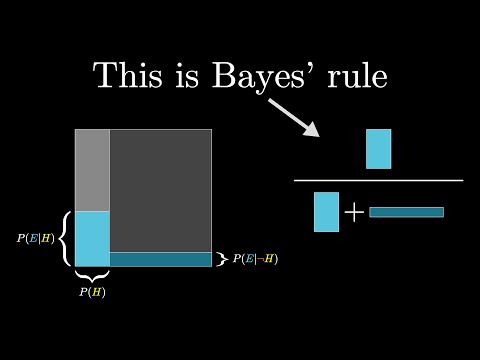

In [ ]:
YouTubeVideo("HZGCoVF3YvM", width=800, height=500)

Let's assume there was a certain disease that was affecting people around the world. Some researchers come up with a vaccine for this disease and begin administering it to people. Now let's assume that 80% of the people who were in the hospital ICU were vaccinated. Based on the information so far, can we make the claim that the vaccine is only 20% effective?

If you think about it, we are missing one crucial piece of evidence - what percentage of the population that was vaccinated ended up in the ICU? This information, rather than the number we already have, will give more insight into the effectiveness of the vaccine.

We know that the probability of a person being vaccinated, given that they are in the ICU is 80%. That is, $P(vac | ICU) = 0.8$. What we really want is the probability of a person going to the ICU if they are vaccinated, that is $P(ICU | vac)$. In order to calculate this, we need two more pieces of **evidence**: what is the probability that a person is vaccinated for this disease $P(vac)$, and what is the probability that a person goes to the ICU for this disease P(ICU). To solve this problem, or indeed any problem that seeks to find a conditional probability when the **reverse conditional probability** and the **individual probabilities** are known, we use Bayes' theorem.

Let's go back to our formula for conditional probability.  
$P(A|B) = \frac{P(A) \cap P(B)}{P(B)}$  
which means  
$P(A) \cap P(B) = P(B)P(A|B)$

We can also write  
$P(B|A) = \frac{P(B) \cap P(A)}{P(A)}$  
which means  
$P(B) \cap P(A) = P(A)P(B|A)$

Now, both $P(A) \cap P(B)$ and $P(B) \cap P(A)$ mean exactly the same thing - they are both the joint probability of events A and B. So the equations can be written as equal to each other:

$P(B)P(A|B) = P(A)P(B|A)$

And rewriting this again, we get:  
$P(B|A) = \frac{P(B)P(A|B)}{P(A)}$

Which is the equation for Bayes' theorem!

Now let us go back to our vaccine example:

Let's say that 0.1% of all people with the disease go to the ICU. So the probability of a person going to the ICU with the disease is 0.001. Let's also assume that the vaccination campaign was very succesful, and 95% of all people were vaccinated. So the probability of being vaccinated is 0.95. Now let's use Bayes' theorem and plug in these numbers:

$P(ICU | vac) = \frac{P(ICU)P(vac | ICU)}{P(vac)}$  
= $\frac{0.001 \times 0.8}{0.95}$

And that is about 0.0008 or 0.08%.

Now what is the probability that an unvaccinated person ends up in the ICU?
$P(ICU | ~vac) = \frac{P(ICU)P(~vac | ICU)}{P(~vac)}$
= $\frac{0.001 \times 0.2}{0.05}$

And that is 0.004 or 0.4%

And now we see that the probability of staying out of the ICU improves by a factor of 5 with the vaccine. Thus Bayes' theorem helps to use new evidence to evaluate or re-evaluate probabilites.

In [16]:
print(0.001*0.8/0.8)
print(0.001*0.2/0.2)


0.001
0.001


## 3 The naive Bayes classification algorithm

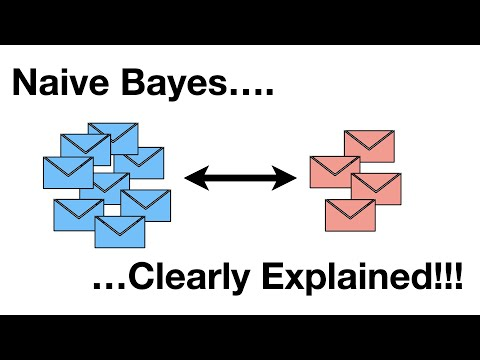

In [ ]:
YouTubeVideo("O2L2Uv9pdDA", width=800, height=500)

### 3.1 How does the naive Bayes classifier work?

Naive Bayes is a simple machine learning algorithm that is based on Bayes' theorem. It is called "naive" because it makes the strong assumption that **each of the feature variables is uncorrelated with the others**.

The algorithm works as follows:

First, it trains on a labeled dataset to calculate the probability of each class (i.e., the target variable) given the values of each the features. Then, for a new instance (i.e., a new set of feature values), it calculates the probability of each class given the feature values. Finally, it selects the class with the highest probability as the prediction for the new instance.

Naive Bayes is often used for text classification (e.g., spam vs. non-spam) and sentiment analysis (e.g., positive vs. negative), and it is considered a fast and efficient algorithm for large datasets. For example, if you want to classify an email as spam or not spam, the features could be the presence of certain words like "money" or "winning", and the classes would be "spam" or "not spam". The Naive Bayes algorithm would calculate the probabilities of these features occurring given each class label, and then use Bayes' theorem to calculate the probabilities of each class label given the features. The class with the highest probability is then chosen as the prediction.

Naive Bayes is considered a **generative model** because it models the joint probability distribution of the features and the class. The algorithm does this by using Bayes' theorem to calculate the probability of a class given the features, but to do this, it needs to estimate the probability distribution of each feature given each class and the overall class probability. This modeling of the joint distribution theoretically allows the algorithm to generate new data from the estimated distribution. This is as opposed to logistic regression which is a **discriminative model** as it onlyy seeks to predict probabilities without modeling the underlying probability distribution.

### 3.2 The math behind naive Bayes

We are trying to find the probability that our dependent variable belongs to a class 'y', given one or more features 'X'. We can name each individual feature in X as $x_1$, $x_2$, $x_3$, etc. According to Bayes' theorem:

$P(y|X) = \frac{P(y)P(X|y)}{P(X)}$

If and only if each of the X variables are independent of each other (uncorrelated), we can write:

$P(X|y) = P(x_1|y)P(x_2|y)P(x_3|y)\cdots$

We can calculate this probability for every label y in our training set. Now in the test set, we assign the label of the class with the highest probability, given the features.

### 3.3 Naive Bayes examples

A short tutorial on using the math behind naive Bayes can be found [here](https://towardsdatascience.com/a-mathematical-explanation-of-naive-bayes-in-5-minutes-44adebcdb5f8). This works for discrete, categorical feature variables.

If we want to use naive Bayes for continuous variables, we will need to make another assumption about the probability distribution of the feature variables. We will not go into the details of this here, but will mention that one such naive Bayes algorithm that handles continuous variables is the Gaussian Naive Bayes model.

In [ ]:
# Load the iris dataset
from sklearn import datasets

# import iris data
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target

# Load the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Split the data into a training and test set
from sklearn.model_selection import train_test_split

# Use 20% of the data as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_train,y_train)

# Make predictions
y_pred = model_sk.predict(X_test)

# Get classification report
from sklearn.metrics import classification_report
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 4 Exercises

For these exercises you will be using a dataset on [COVID deaths by age group and vaccination status](https://data.ontario.ca/dataset/deaths-involving-covid-19-by-vaccination-status/resource/2aa6e2ce-40de-4910-a737-81762e014b0b).

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_10/Wiskunde")

In [48]:
import pandas as pd
covid_data = pd.read_csv('covid_vacc_data.csv')

### Exercise 1: Aggregate the data by age group, so that you have one row per age group. Drop the columns for date and ID. Visualize your results.

In [49]:
## Your code here

grouped = covid_data.groupby("age_group").sum()
grouped = grouped.drop(["_id"], axis=1)

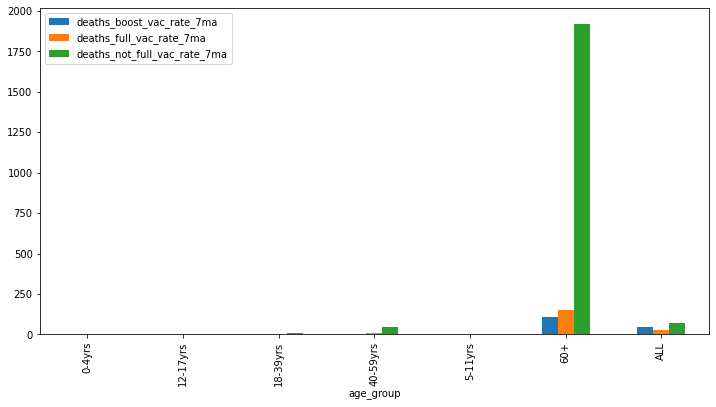

In [50]:
grouped.plot(kind="bar", figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35653ff340>,
      dtype=object)

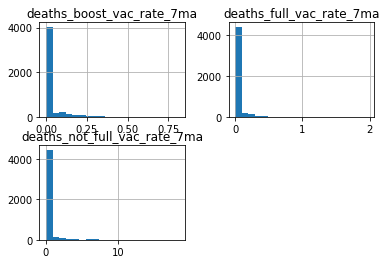

In [51]:
covid_data.drop("_id", axis=1).hist(bins=20)
# not skewed so mean is fine

### Exercise 2: What are the total death rates per age group?

In [52]:
## Your code here
grouped["total_d_rate"] = (grouped["deaths_boost_vac_rate_7ma"] + grouped["deaths_full_vac_rate_7ma"] + grouped["deaths_not_full_vac_rate_7ma"]) 
grouped.iloc[:,-1]

age_group
0-4yrs         1.26
12-17yrs       1.33
18-39yrs       7.96
40-59yrs      57.12
5-11yrs        0.28
60+         2177.60
ALL          145.72
Name: total_d_rate, dtype: float64

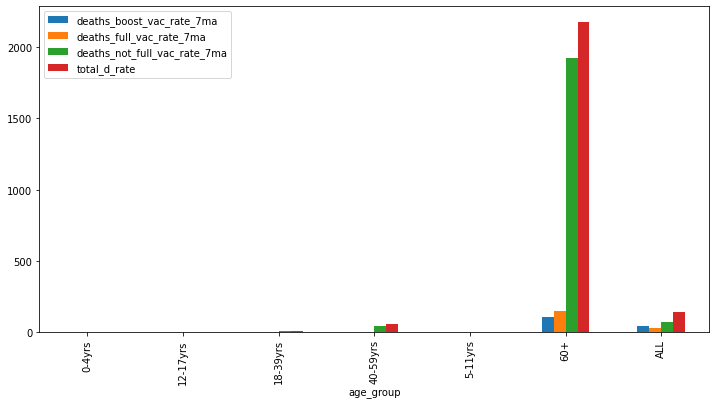

In [53]:
grouped.plot(kind="bar", figsize=(12,6))

In [54]:
covid_data = covid_data.drop(["_id","date"], axis=1)

In [55]:
covid_data

,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,0-4yrs,0.00,0.00,0.00
1,5-11yrs,0.00,0.00,0.00
2,12-17yrs,0.00,0.00,0.00
3,18-39yrs,0.00,0.00,0.00
4,40-59yrs,0.00,0.00,0.02
...,...,...,...,...
4874,12-17yrs,0.00,0.00,0.00
4875,18-39yrs,0.00,0.00,0.00
4876,40-59yrs,0.00,0.00,0.00
4877,60+,0.13,0.03,0.26


In [66]:
grouped['test'] = grouped.iloc[:, 0:3].prod(axis=1)
grouped

,unvaccinated,total_d_rate,vaccinated,test
age_group,,,,
0-4yrs,1.26,1.26,0.000,0.000000e+00
12-17yrs,1.19,1.33,0.070,1.107890e-01
18-39yrs,6.82,7.96,0.570,3.094370e+01
40-59yrs,47.61,57.12,4.755,1.293114e+04
5-11yrs,0.28,0.28,0.000,0.000000e+00
60+,1920.74,2177.60,128.430,5.371718e+08
ALL,69.59,145.72,38.065,3.860040e+05


### Exercise 3: What are the total death rates per vaccination status?

In [57]:
## Your code here
grouped.loc["ALL"]

deaths_boost_vac_rate_7ma        48.09
deaths_full_vac_rate_7ma         28.04
deaths_not_full_vac_rate_7ma     69.59
total_d_rate                    145.72
Name: ALL, dtype: float64

### Exercise 4: Based on this data, if someone has died of COVID, what is the probability they are in the age-group 18-39?

In [58]:
grouped.iloc[:,-1][2] / grouped.iloc[:,-1][0:6].sum()

0.0035447885818619056

In [59]:
## Your code here
grouped.iloc[:,-1]

age_group
0-4yrs         1.26
12-17yrs       1.33
18-39yrs       7.96
40-59yrs      57.12
5-11yrs        0.28
60+         2177.60
ALL          145.72
Name: total_d_rate, dtype: float64

### Exercise 5: Based on this data, if someone has died of COVID, what is the probability they are a) unvaccinated b) fully vaccinated c) boosted?

In [60]:
## Your code here
print(f"a)unvaccinated = {grouped.loc['ALL'][2]}")
print(f"b)fully vaccinated = {grouped.loc['ALL'][1]}")
print(f"c)boosted = {grouped.loc['ALL'][0]}")

a)unvaccinated = 69.59
b)fully vaccinated = 28.04
c)boosted = 48.09


### Exercise 6: Add the columns boosted and fully vaccinated together and coll this 'vaccinated'. Call the other column 'unvaccinated'. If someone in the age group 18-39 has died, what is the probability that they are unvaccinated?

In [61]:
## Your code here
grouped["vaccinated"] = (grouped["deaths_full_vac_rate_7ma"] + grouped["deaths_boost_vac_rate_7ma"]) / 2
grouped = grouped.rename(columns={"deaths_not_full_vac_rate_7ma": "unvaccinated"}).drop(["deaths_boost_vac_rate_7ma","deaths_full_vac_rate_7ma"], axis=1)

In [62]:
grouped

,unvaccinated,total_d_rate,vaccinated
age_group,,,
0-4yrs,1.26,1.26,0.000
12-17yrs,1.19,1.33,0.070
18-39yrs,6.82,7.96,0.570
40-59yrs,47.61,57.12,4.755
5-11yrs,0.28,0.28,0.000
60+,1920.74,2177.60,128.430
ALL,69.59,145.72,38.065


### Exercise 7: If someone in the age group 5-11 has died, what is the probability that they are unvaccinated?

In [63]:
## Your code here
# 100%, there is noone died who is vaccinated from this group
covid_data[(covid_data.age_group == "5-11yrs") & ((covid_data.deaths_full_vac_rate_7ma > 0) | (covid_data.deaths_boost_vac_rate_7ma > 0))]

,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma


### Exercise 8: If a vaccinated person has died, what is the probability that they are a) under 60, b) over 60?

In [64]:
## Your code here
print(f"a) under 60 = {1-grouped.vaccinated[5] / grouped.vaccinated[0:6].sum()}")
print(f"b) over 60 = {grouped.vaccinated[5] / grouped.vaccinated[0:6].sum()}")


a) under 60 = 0.04031384270502525
b) over 60 = 0.9596861572949748


### Exercise 9: Based on the data, which variable is more relevant in predicting whether a person dies? Age, or vaccination status?

In [ ]:
## Your code here

# age makes a difference especially after 60 but based on the data vaccination status more relevant in predicting whether a person dies.
# 1 - our data set is not only people above 60
# 2 - also in row All unvaccinated has 2:1 to vaccinated
grouped

,unvaccinated,total_d_rate,vaccinated
age_group,,,
0-4yrs,0.001808,0.000603,0.000000
12-17yrs,0.001707,0.000636,0.000100
18-39yrs,0.009785,0.003807,0.000818
40-59yrs,0.068307,0.027317,0.006822
5-11yrs,0.000402,0.000134,0.000000
60+,2.755725,1.041416,0.184261
ALL,0.099842,0.069689,0.054613


``` f(x) = ( 1 / np.sqrt(2*np.pi* (variance**2) ) e (-(x-mean) ** 2 ) / 2 * variance**2 ```